In [1]:
import pandas as pd
import numpy as np

In [2]:
ptld_data = pd.read_csv('PTLD_Data.csv')
donor_deceased = pd.read_csv('Data/SRTR/donor_deceased.csv')
rec_histo = pd.read_csv('Data/SRTR/rec_histo.csv')
fol_immuno = pd.read_csv('Data/SRTR/fol_immuno.csv')
# institution = pd.read_csv('Data/SRTR/institution.csv')
# institution = institution.rename(columns={"CTR_CD": "REC_CTR_CD"})
tte = pd.read_csv('TIME_TO_EVENT_PTLD.csv')
ID1Y = pd.read_csv('ID1Y_LUNG.csv')
ID2Y = pd.read_csv('ID2Y_LUNG.csv')
ID3Y = pd.read_csv('ID3Y_LUNG.csv')
ID4Y = pd.read_csv('ID4Y_LUNG.csv')
ID5Y = pd.read_csv('ID5Y_LUNG.csv')
ID8Y = pd.read_csv('ID8Y_LUNG.csv')
ID10Y = pd.read_csv('ID10Y_LUNG.csv')
ID12Y = pd.read_csv('ID12Y_LUNG.csv')
ID15Y = pd.read_csv('ID15Y_LUNG.csv')
rec_histo = rec_histo[['REC_DRW51','REC_DRW52','REC_DRW53','REC_HISTO_TX_ID']]
data = pd.merge(ptld_data, tte, on="PERS_ID",how="left")
data = pd.merge(data, donor_deceased, on="DONOR_ID",how="left")
data = pd.merge(data, rec_histo, on="REC_HISTO_TX_ID",how="left")
data.to_csv('TX_LU_DONOR_DECEASED.csv',index=False)

<ipython-input-2-49d304bd412b>:1: DtypeWarning: Columns (32,33,37,62,154,222,309) have mixed types. Specify dtype option on import or set low_memory=False.
  ptld_data = pd.read_csv('PTLD_Data.csv')
<ipython-input-2-49d304bd412b>:2: DtypeWarning: Columns (16,27,29,43,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,69,70,72,74,76,78,79,80,81,82,83,84,86,87,88,89,91,95,96,97,99,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,130,131,132,133,134,137,163,168,180,190,193,226,227,228,229,230,231,245,248,249,250,251,252,253,254) have mixed types. Specify dtype option on import or set low_memory=False.
  donor_deceased = pd.read_csv('Data/SRTR/donor_deceased.csv')
<ipython-input-2-49d304bd412b>:3: DtypeWarning: Columns (4,8,31,37,38,44,45,51,52,59,60,61,62,111) have mixed types. Specify dtype option on import or set low_memory=False.
  rec_histo = pd.read_csv('Data/SRTR/rec_histo.csv')


In [3]:
tte

,TIME_TO_EVENT,PERS_ID,Censor
0,401,3637564,1
1,728,3569461,1
2,362,3663453,1
3,1700,3556677,1
4,1424,3577244,1
...,...,...,...
33239,3764,4698919,0
33240,2814,4922394,0
33241,2946,4991773,0
33242,1121,5283877,0


In [4]:
# Select the variables

col_names = data.columns.tolist()
clinical = data[['TRR_ID','REC_TX_DT','PERS_ID_x','DONOR_ID','REC_LU_LF_ISCH','REC_LU_RT_ISCH','REC_TOT_BILI','REC_CREAT','REC_BMI','REC_AGE_AT_TX','DON_AGE_x','DON_EJECT_FRACT','DON_HGT_CM_x','DON_WGT_KG_x','CAN_CARDIAC_OUTPUT','DON_PA_DIAST_INIT',
                 'REC_POSTX_LOS','REC_MM_EQUIV_TX','REC_A_MM_EQUIV_TX','REC_B_MM_EQUIV_TX','REC_DR_MM_EQUIV_TX','CAN_GENDER','CAN_DGN','REC_DGN','CAN_EDUCATION','CAN_ABO','DON_ABO_x','CAN_MALIG','REC_MALIG','CAN_DIAB_TY','CAN_DIAB','DON_HIST_DIAB_x','REC_HCV_STAT','REC_CMV_STAT',
                 'REC_EBV_STAT','DON_GENDER_x','DON_EBNA','DON_EBV_IGG','DON_EBV_IGM','DON_ANTI_HCV_x','DON_CONT_CIGARETTE_x','DON_HIST_ALCOHOL','DON_ANTI_CMV_x','REC_MED_COND','CAN_ETHNICITY_SRTR','CAN_RACE_SRTR','DON_RACE_SRTR_x','DON_RACE_HISPANIC_LATINO',
                 'CAN_PEPTIC_ULCER','REC_CHRONIC_STEROIDS','REC_ANTIVRL_THERAPY','REC_LIFE_SUPPORT','REC_TX_PROCEDURE_TY','REC_VAD_TY','CAN_PERIPH_VASC','REC_TX_EXTRA_VESSEL','REC_CARDIAC_SURG','REC_LU_SURG','REC_A1','REC_A2','REC_B1','REC_B2','REC_DR1','REC_DR2','REC_DRW51','REC_DRW52','REC_DRW53',
                 'DON_A1_x','DON_A2_x','DON_B1_x','DON_B2_x','DON_DR1_x','DON_DR2_x','DON_C1','DON_C2','DON_DP1','DON_DP2','DON_DQ1','DON_DQ2','DON_DR51','DON_DR52','DON_DR53','DON_BW6','DON_HBC_STAT','DON_INFECT_BLOOD','DON_INFECT_LU','DON_INFECT_URINE',
                 'DON_ANTI_HYPERTEN','DON_CORONARY_ANGIO','DON_HIST_ALCOHOL','DON_HIST_OTHER_DRUG_x','DON_PRERECOV_DIURETICS','DON_PRERECOV_STEROIDS','DON_PULM_CATH','DON_TATTOOS',
                 'REC_INFECT_IV_DRUG','REC_POSTX_DRUG_TREAT_INFECT','DON_HIST_CANCER_x','REC_CTR_CD','PTLD','TIME_TO_EVENT','Censor']]
immuno = data[col_names[data.columns.get_loc('INDUCTION_-3.0'):data.columns.get_loc('MAINTENANCE_DISCHARGE_4949.0')+1]]
immuno = immuno[['INDUCTION_8.0','INDUCTION_14.0','INDUCTION_16.0','INDUCTION_41.0','INDUCTION_42.0','INDUCTION_43.0','INDUCTION_50.0','INDUCTION_333.0','INDUCTION_555.0','INDUCTION_666.0','INDUCTION_999.0','INDUCTION_4949.0',
                 'ANTI_REJECTION_16.0','ANTI_REJECTION_4949.0']]
data = pd.concat([clinical,immuno],axis=1)

In [5]:
data[['REC_MM_EQUIV_TX','REC_A_MM_EQUIV_TX','REC_B_MM_EQUIV_TX','REC_DR_MM_EQUIV_TX']].head(50)

,REC_MM_EQUIV_TX,REC_A_MM_EQUIV_TX,REC_B_MM_EQUIV_TX,REC_DR_MM_EQUIV_TX
0,NaN,1.0,2.0,NaN
1,6.0,2.0,2.0,2.0
2,3.0,1.0,1.0,1.0
3,4.0,1.0,2.0,1.0
4,5.0,2.0,2.0,1.0
5,6.0,2.0,2.0,2.0
6,5.0,2.0,2.0,1.0
7,6.0,2.0,2.0,2.0
8,4.0,0.0,2.0,2.0
9,3.0,1.0,1.0,1.0


In [6]:
# Pre-process the data
# Delete 'UNK' before creating the Blood Type Mismatch variable for the data

data['REC_AGE_AT_TX_CAT'] = 0
data['REC_AGE_AT_TX_CAT'][data['REC_AGE_AT_TX'].isna()] = np.nan
data['REC_AGE_AT_TX_CAT'][data['REC_AGE_AT_TX']<20] = '<20'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=20)&(data['REC_AGE_AT_TX']<30)] = '20-29'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=30)&(data['REC_AGE_AT_TX']<40)] = '30-39'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=40)&(data['REC_AGE_AT_TX']<50)] = '40-49'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=50)&(data['REC_AGE_AT_TX']<60)] = '50-59'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=60)&(data['REC_AGE_AT_TX']<70)] = '60-69'
data['REC_AGE_AT_TX_CAT'][(data['REC_AGE_AT_TX']>=70)&(data['REC_AGE_AT_TX']<80)] = '70-79'
data['REC_AGE_AT_TX_CAT'][data['REC_AGE_AT_TX']>=80] = '>=80'
###########
data['DON_AGE_CAT'] = 0
data['DON_AGE_CAT'][data['DON_AGE_x'].isna()] = np.nan
data['DON_AGE_CAT'][data['DON_AGE_x']<20] = '<20'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=20)&(data['DON_AGE_x']<30)] = '20-29'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=30)&(data['DON_AGE_x']<40)] = '30-39'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=40)&(data['DON_AGE_x']<50)] = '40-49'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=50)&(data['DON_AGE_x']<60)] = '50-59'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=60)&(data['DON_AGE_x']<70)] = '60-69'
data['DON_AGE_CAT'][(data['DON_AGE_x']>=70)&(data['DON_AGE_x']<80)] = '70-79'
data['DON_AGE_CAT'][data['DON_AGE_x']>=80] = '>=80'

data['DON_ABO_x'] = data['DON_ABO_x'].replace('UNK',np.nan)
data['ABO_MATCH'] = data['CAN_ABO']==data['DON_ABO_x']
data['ABO_MATCH'] = data['ABO_MATCH'].astype(str)
data['ABO_MATCH'].iloc[np.where(data['DON_ABO_x'].isnull())[0].tolist()]=np.nan
data['ABO_MATCH'].iloc[np.where(data['CAN_ABO'].isnull())[0].tolist()]=np.nan
data['GENDER_MATCH'] = data['CAN_GENDER']==data['DON_GENDER_x']
data['GENDER_MATCH'] = data['GENDER_MATCH'].astype(str)
data['GENDER_MATCH'].iloc[np.where(data['CAN_GENDER'].isnull())[0].tolist()]=np.nan
data['GENDER_MATCH'].iloc[np.where(data['DON_GENDER_x'].isnull())[0].tolist()]=np.nan
data['AGE_DIFFERENCE'] = abs(data['REC_AGE_AT_TX']-data['DON_AGE_x'])
data['REC_AGE_AT_TX_50'] = data['REC_AGE_AT_TX'].replace(range(0,50),0)
data['REC_AGE_AT_TX_50'] = data['REC_AGE_AT_TX_50'].replace(range(50,120),1)
data['REC_TX_DT'] = pd.to_datetime(data['REC_TX_DT'])
data['REC_TX_DT'] = data['REC_TX_DT'].dt.year
data['REC_TX_DT_2008'] = data['REC_TX_DT']
data['REC_TX_DT_2008'] = data['REC_TX_DT_2008'].replace(range(1987,2008),0)
data['REC_TX_DT_2008'] = data['REC_TX_DT_2008'].replace(range(2008,2022),1)
data['REC_BMI_CAT'] = 0
data['REC_BMI_CAT'][data['REC_BMI'].isna()] = np.nan
data['REC_BMI_CAT'][data['REC_BMI']<18.5] = 'Underweight'
data['REC_BMI_CAT'][(data['REC_BMI']>=18.5)&(data['REC_BMI']<25)] = 'Normal'
data['REC_BMI_CAT'][(data['REC_BMI']>=25)&(data['REC_BMI']<30)] = 'Overweight'
data['REC_BMI_CAT'][(data['REC_BMI']>=30)] = 'Obese'
data['REC_CHRONIC_STEROIDS'] = data['REC_CHRONIC_STEROIDS'].replace('U',np.nan)
data['REC_EBV_STAT'] = data['REC_EBV_STAT'].replace(['ND','U'], np.nan)
data['REC_CMV_STAT'] = data['REC_CMV_STAT'].replace(['ND','U'], np.nan)
data['REC_ANTIVRL_THERAPY'] = data['REC_ANTIVRL_THERAPY'].replace('U', np.nan)
data['DON_ANTI_CMV_x'] = data['DON_ANTI_CMV_x'].replace(['ND','U','I','C'], np.nan)
data['CMV_MATCH'] = data['REC_CMV_STAT']==data['DON_ANTI_CMV_x']
data['CMV_MATCH'] = data['CMV_MATCH'].astype(str)
data['CMV_MATCH'].iloc[np.where(data['DON_ANTI_CMV_x'].isnull())[0].tolist()]=np.nan
data['CMV_MATCH'].iloc[np.where(data['REC_CMV_STAT'].isnull())[0].tolist()]=np.nan
data['DON_ANTI_HCV_x'] = data['DON_ANTI_HCV_x'].replace(['ND','U','I','C','PD'], np.nan)
data['REC_HCV_STAT'] = data['REC_HCV_STAT'].replace(['ND','U'], np.nan)
data['DON_EBV_IGG'] = data['DON_EBV_IGG'].replace(['PD','ND','U','I','C'], np.nan) # 1 (I have always used this)
data['DON_EBV_IGM'] = data['DON_EBV_IGM'].replace(['PD','ND','U','I','C'], np.nan) 
data['CAN_ABO'] = data['CAN_ABO'].replace(['AB','A1','A2','A1B','A2B'],'OTHER')
data['DON_ABO_x'] = data['DON_ABO_x'].replace(['AB','A1B','A2B'],'OTHER')
data['CAN_RACE_SRTR'] = data['CAN_RACE_SRTR'].replace(['ASIAN','NATIVE','MULTI','PACIFIC'],'OTHER')
data['DON_RACE_SRTR_x'] = data['DON_RACE_SRTR_x'].replace(['NATIVE','MULTI','PACIFIC'],'OTHER')
data['CAN_DIAB_TY'] = data['CAN_DIAB_TY'].replace(998, np.nan)
data['CAN_DIAB_TY'] = data['CAN_DIAB_TY'].replace(1,'NO')
data['CAN_DIAB_TY'] = data['CAN_DIAB_TY'].replace([2,3,4,5],'YES')
data['DON_HIST_DIAB_x'] = data['DON_HIST_DIAB_x'].replace(1,'NO')
data['DON_HIST_DIAB_x'] = data['DON_HIST_DIAB_x'].replace([2,3,4,5],'YES')
data['DON_HIST_DIAB_x'] = data['DON_HIST_DIAB_x'].replace(998, np.nan)
data['CAN_MALIG'] = data['CAN_MALIG'].replace('U', np.nan)
data['REC_MALIG'] = data['REC_MALIG'].replace('U',np.nan)
data['CAN_EDUCATION'] = data['CAN_EDUCATION'].replace(1000,np.nan)
data['CAN_EDUCATION'] = data['CAN_EDUCATION'].replace([1.0,2.0,3.0,4.0,5.0,6.0],
                                                      ["NONE","GRADE_SCHOOL","HIGH_SCHOOL","ATT_COLLEGE","ASSOCIATE_BACHELOR","POST_GRAD"])
data['REC_TX_PROCEDURE_TY'] = data['REC_TX_PROCEDURE_TY'].replace([606,605],"OTHER") 
data['REC_TX_PROCEDURE_TY'] = data['REC_TX_PROCEDURE_TY'].replace([603,601,602,604],["BILATERAL_SEQUENTIAL_LUNG","SINGLE_LEFT_LUNG","SINGLE_RIGHT_LUNG","EN-BLOC DOUBLE LUNG"]) 
data["REC_POSTX_DRUG_TREAT_INFECT"] = data["REC_POSTX_DRUG_TREAT_INFECT"].replace("U",np.nan)
data['CAN_DGN'] = data['CAN_DGN'].replace(1999.0,np.nan) 
data['CAN_DGN'] = data['CAN_DGN'].replace([1521.0,219.0, 1612.0, 1611.0, 1609.0, 1615.0, 434.0, 220.0, 1610.0, 1997.0, 413.0,      
                                           403.0, 438.0,  208.0,  402.0,  1519.0, 447.0, 448.0, 1998.0, 1500.0, 106.0, 999.0,        
                                           417.0, 418.0,  113.0,  422.0,  1614.0, 1554.0, 432.0, 103.0,  1523.0, 1501.0,       
                                           400.0, 1200.0, 1551.0, 111.0,  216.0,  404.0,  114.0, 1000.0, 424.0, 300.0,        
                                           213.0, 1600.0, 1524.0, 302.0,  1498.0, 1203.0, 1549.0, 1522.0, 1550.0, 1603.0,       
                                           1557.0, 212.0, 1502.0, 218.0,  303.0,  1548.0, 1517.0, 206.0,  109.0,  100.0,        
                                           1552.0, 214.0, 1599.0, 116.0,  215.0,   217.0, 449.0,  405.0,  210.0,  401.0,        
                                           440.0,  1518.0, 1556.0, 1052.0, 1202.0, 416.0, 1050.0, 160.0,  419.0,  1049.0,       
                                           1103.0, 437.0, 1497.0, 412.0,1608.0],'OTHER') 
data['REC_DGN'] = data['REC_DGN'].replace(data['REC_DGN'].value_counts().index.tolist()[13::],'OTHER') 
data['REC_DGN'] = data['REC_DGN'].replace([1521.0,1612.0,220.0],'OTHER') 
data['DON_PRERECOV_STEROIDS'] = data['DON_PRERECOV_STEROIDS'].replace('U', np.nan)
data['DON_PRERECOV_DIURETICS'] = data['DON_PRERECOV_DIURETICS'].replace('U', np.nan)
data['REC_INFECT_IV_DRUG'] = data['REC_INFECT_IV_DRUG'].replace('U',np.nan)
data['REC_MED_COND'] = data['REC_MED_COND'].replace(1, 'INTENSIVE_CARE')
data['REC_MED_COND'] = data['REC_MED_COND'].replace(2, 'HOSPITALIZED')
data['REC_MED_COND'] = data['REC_MED_COND'].replace(3, 'NOT_HOSPITALIZED')
data['DON_CONT_CIGARETTE_x'] = data['DON_CONT_CIGARETTE_x'].replace('U',np.nan)
data['DON_HIST_ALCOHOL'] = data['DON_HIST_ALCOHOL'].replace('U',np.nan)
data['REC_LU_SURG'] = data['REC_LU_SURG'].replace('U',np.nan)
data['REC_CARDIAC_SURG'] = data['REC_CARDIAC_SURG'].replace('U',np.nan)
data['REC_TX_EXTRA_VESSEL'] = data['REC_TX_EXTRA_VESSEL'].replace('U',np.nan)
data['CAN_PERIPH_VASC'] = data['CAN_PERIPH_VASC'].replace('U',np.nan)
data['DON_HBC_STAT'] = data['DON_HBC_STAT'].replace([3,4,5,6,7],np.nan)
data['DON_ANTI_HYPERTEN'] = data['DON_ANTI_HYPERTEN'].replace('U',np.nan)
data['REC_VAD_TY'] = data['REC_VAD_TY'].replace([1,2,5,6],["NONE","LVAD","LVADRVAD","Device_Unspecified"])
data['REC_VAD_TY'] = data['REC_VAD_TY'].replace([3,4],"OTHER")
data['REC_A1'] = data['REC_A1'].replace([97.0,98.0,99.0], np.nan)
data['REC_A2'] = data['REC_A2'].replace([97.0,98.0,99.0], np.nan)
data['REC_B1'] = data['REC_B1'].replace([97.0,98.0,99.0], np.nan)
data['REC_B2'] = data['REC_B2'].replace([97.0,98.0,99.0], np.nan)
data['REC_DR1'] = data['REC_DR1'].replace([97.0,98.0,99.0], np.nan)
data['REC_DR2'] = data['REC_DR2'].replace([97.0,98.0,99.0], np.nan)
data['REC_DRW51'] = data['REC_DRW51'].replace([99.0,998.0,98.0,1.0,3.0,0.0,2.0,4.0,5.0], np.nan) 
data['REC_DRW52'] = data['REC_DRW52'].replace([99.0,998.0,98.0,1.0,2.0,4.0,5.0,0.0,3.0,7.0,6.0], np.nan) 
data['REC_DRW53'] = data['REC_DRW53'].replace([99.0,998.0,98.0,3.0,2.0,0.0,1.0], np.nan) 
data['DON_A1_x'] = data['DON_A1_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_A2_x'] = data['DON_A2_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_B1_x'] = data['DON_B1_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_B2_x'] = data['DON_B2_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_BW6'] = data['DON_BW6'].replace([98.0,998.0,99.0,0.0,2.0], np.nan)
data['DON_BW6'] = data['DON_BW6'].replace([95.0,96.0],[1,0])
data['DON_DR1_x'] = data['DON_DR1_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_DR2_x'] = data['DON_DR2_x'].replace([97.0,98.0,99.0], np.nan)
data['DON_C1'] = data['DON_C1'].replace([97.0,98.0,99.0,100.0], np.nan)
data['DON_C2'] = data['DON_C2'].replace([97.0,98.0,99.0,100.0], np.nan)
data['DON_DP1'] = data['DON_DP1'].replace([97.0,99.0], np.nan)
data['DON_DP2'] = data['DON_DP2'].replace([97.0,99.0], np.nan)
data['DON_DQ1'] = data['DON_DQ1'].replace([97.0,99.0], np.nan)
data['DON_DQ2'] = data['DON_DQ2'].replace([97.0,99.0], np.nan)
data['DON_DR51'] = data['DON_DR51'].replace([99.0,998.0,3.0,98.0,5.0,0.0,1.0,2.0], np.nan) 
data['DON_DR52'] = data['DON_DR52'].replace([98.0,998.0,5.0,4.0,99.0,7.0,2.0,1.0,0.0,3.0], np.nan)
data['DON_DR53'] = data['DON_DR53'].replace([98.0,998.0,3.0,99.0,2.0,1.0,0.0], np.nan)

data['DON_TATTOOS'] = data['DON_TATTOOS'].replace('U',np.nan)

<ipython-input-6-334894db0776>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['REC_AGE_AT_TX_CAT'][data['REC_AGE_AT_TX'].isna()] = np.nan
<ipython-input-6-334894db0776>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [7]:
data[['REC_AGE_AT_TX','REC_AGE_AT_TX_CAT']].head(100)

,REC_AGE_AT_TX,REC_AGE_AT_TX_CAT
0,49,40-49
1,53,50-59
2,34,30-39
3,55,50-59
4,52,50-59
...,...,...
95,54,50-59
96,42,40-49
97,40,40-49
98,64,60-69


In [8]:
data[['DON_AGE_x','DON_AGE_CAT']].head(100)

,DON_AGE_x,DON_AGE_CAT
0,16,<20
1,32,30-39
2,15,<20
3,16,<20
4,16,<20
...,...,...
95,23,20-29
96,18,<20
97,23,20-29
98,41,40-49


In [9]:
def hla_processing_recipient(dataset,colname1,colname2,HLA_type):
    # One-hot encode HLA categories
    HLA1 = pd.get_dummies(dataset[colname1].astype(str))
    HLA1[HLA1['nan']==1] = np.nan
    HLA1 = HLA1.drop(['nan'], axis=1)
    HLA2 = pd.get_dummies(dataset[colname2].astype(str))
    HLA2[HLA2['nan']==1] = np.nan
    HLA2 = HLA2.drop(['nan'], axis=1)
    dataset = dataset.drop([colname1,colname2], axis=1)
    
    # Add newly one-hot encoded variables to the dataset
    colHLA1 = HLA1.columns
    colHLA2 = HLA2.columns
    common_columns = colHLA1.intersection(colHLA2)
    for i in common_columns:
        dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
        dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
    return dataset

In [10]:
def hla_processing_donor(dataset,colname1,colname2,HLA_donor_type):
    # One-hot encode HLA categories
    HLADON1 = pd.get_dummies(dataset[colname1].astype(str))
    HLADON1[HLADON1['nan']==1] = np.nan
    HLADON1 = HLADON1.drop(['nan'], axis=1)
    HLADON2 = pd.get_dummies(dataset[colname2].astype(str))
    HLADON2[HLADON2['nan']==1] = np.nan
    HLADON2 = HLADON2.drop(['nan'], axis=1)
    dataset = dataset.drop([colname1,colname2], axis=1)
    
    # Add newly one-hot encoded variables to the dataset
    colHLADON1 = HLADON1.columns
    colHLADON2 = HLADON2.columns
    common_columns = colHLADON1.intersection(colHLADON2)
    for i in common_columns:
        dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
        dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
    return dataset

In [11]:
data = hla_processing_recipient(dataset=data,colname1='REC_A1',colname2='REC_A2',HLA_type='A')
data = hla_processing_recipient(dataset=data,colname1='REC_B1',colname2='REC_B2',HLA_type='B')
data = hla_processing_recipient(dataset=data,colname1='REC_DR1',colname2='REC_DR2',HLA_type='DR')
data = hla_processing_donor(dataset=data,colname1='DON_A1_x',colname2='DON_A2_x',HLA_donor_type='A')
data = hla_processing_donor(dataset=data,colname1='DON_B1_x',colname2='DON_B2_x',HLA_donor_type='B')
data = hla_processing_donor(dataset=data,colname1='DON_DR1_x',colname2='DON_DR2_x',HLA_donor_type='DR')
data = hla_processing_donor(dataset=data,colname1='DON_C1',colname2='DON_C2',HLA_donor_type='C')
data = hla_processing_donor(dataset=data,colname1='DON_DP1',colname2='DON_DP2',HLA_donor_type='DPw')
data = hla_processing_donor(dataset=data,colname1='DON_DQ1',colname2='DON_DQ2',HLA_donor_type='DQ')

<ipython-input-9-be8ef69405c4>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA1[HLA1['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA1[HLA1['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA1[HLA1['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future versi

<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA2[HLA2['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA2[HLA2['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLA2[HLA2['nan']==1] = np.nan
<ipython-input-9-be8ef69405c4>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future versi

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_type+i] = pd.concat([HLA1[i],HLA2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-9-be8ef69405c4>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_type+i] = dataset["HLA_"+HLA_type+i].replace(2,1)
<ipython-input-9-be8ef69405c4>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON1[HLADON1['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  HLADON2[HLADON2['nan']==1] = np.nan
<ipython-input-10-406a26115ca7>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an e

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = pd.concat([HLADON1[i],HLADON2[i]],axis=1).sum(axis=1, min_count=1)
<ipython-input-10-406a26115ca7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["HLA_"+HLA_donor_type+i+"DONOR"] = dataset["HLA_"+HLA_donor_type+i+"DONOR"].replace(2,1)
<ipython-input-10-406a26115ca7>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head(1)


,TRR_ID,REC_TX_DT,PERS_ID_x,DONOR_ID,REC_LU_LF_ISCH,REC_LU_RT_ISCH,REC_TOT_BILI,REC_CREAT,REC_BMI,REC_AGE_AT_TX,DON_AGE_x,DON_EJECT_FRACT,DON_HGT_CM_x,DON_WGT_KG_x,CAN_CARDIAC_OUTPUT,DON_PA_DIAST_INIT,REC_POSTX_LOS,REC_MM_EQUIV_TX,REC_A_MM_EQUIV_TX,REC_B_MM_EQUIV_TX,REC_DR_MM_EQUIV_TX,CAN_GENDER,CAN_DGN,REC_DGN,CAN_EDUCATION,CAN_ABO,DON_ABO_x,CAN_MALIG,REC_MALIG,CAN_DIAB_TY,CAN_DIAB,DON_HIST_DIAB_x,REC_HCV_STAT,REC_CMV_STAT,REC_EBV_STAT,DON_GENDER_x,DON_EBNA,DON_EBV_IGG,DON_EBV_IGM,DON_ANTI_HCV_x,DON_CONT_CIGARETTE_x,DON_HIST_ALCOHOL,DON_ANTI_CMV_x,REC_MED_COND,CAN_ETHNICITY_SRTR,CAN_RACE_SRTR,DON_RACE_SRTR_x,DON_RACE_HISPANIC_LATINO,CAN_PEPTIC_ULCER,REC_CHRONIC_STEROIDS,REC_ANTIVRL_THERAPY,REC_LIFE_SUPPORT,REC_TX_PROCEDURE_TY,REC_VAD_TY,CAN_PERIPH_VASC,REC_TX_EXTRA_VESSEL,REC_CARDIAC_SURG,REC_LU_SURG,REC_DRW51,REC_DRW52,REC_DRW53,DON_DR51,DON_DR52,DON_DR53,DON_BW6,DON_HBC_STAT,DON_INFECT_BLOOD,DON_INFECT_LU,DON_INFECT_URINE,DON_ANTI_HYPERTEN,DON_CORONARY_ANGIO,DON_HIST_ALCOHOL,DON_HIST_OTHER_DRUG_x,DON_PRERECOV_DIURETICS,DON_PRERECOV_STEROIDS,DON_PULM_CATH,DON_TATTOOS,REC_INFECT_IV_DRUG,REC_POSTX_DRUG_TREAT_INFECT,DON_HIST_CANCER_x,REC_CTR_CD,PTLD,TIME_TO_EVENT,Censor,INDUCTION_8.0,INDUCTION_14.0,INDUCTION_16.0,INDUCTION_41.0,INDUCTION_42.0,INDUCTION_43.0,INDUCTION_50.0,INDUCTION_333.0,INDUCTION_555.0,INDUCTION_666.0,INDUCTION_999.0,INDUCTION_4949.0,ANTI_REJECTION_16.0,ANTI_REJECTION_4949.0,REC_AGE_AT_TX_CAT,DON_AGE_CAT,ABO_MATCH,GENDER_MATCH,AGE_DIFFERENCE,REC_AGE_AT_TX_50,REC_TX_DT_2008,REC_BMI_CAT,CMV_MATCH,HLA_A1.0,HLA_A10.0,HLA_A101.0,HLA_A11.0,HLA_A1101.0,HLA_A19.0,HLA_A2.0,HLA_A201.0,HLA_A202.0,HLA_A203.0,HLA_A205.0,HLA_A206.0,HLA_A23.0,HLA_A24.0,HLA_A2402.0,HLA_A2403.0,HLA_A25.0,HLA_A26.0,HLA_A2601.0,HLA_A28.0,HLA_A29.0,HLA_A2901.0,HLA_A2902.0,HLA_A3.0,HLA_A30.0,HLA_A3001.0,HLA_A3002.0,HLA_A301.0,HLA_A302.0,HLA_A31.0,HLA_A32.0,HLA_A33.0,HLA_A34.0,HLA_A36.0,HLA_A66.0,HLA_A6601.0,HLA_A68.0,HLA_A6801.0,HLA_A69.0,HLA_A74.0,HLA_A9.0,HLA_B0.0,HLA_B12.0,HLA_B13.0,HLA_B1302.0,HLA_B14.0,HLA_B1401.0,HLA_B1402.0,HLA_B15.0,HLA_B1501.0,HLA_B1503.0,HLA_B1517.0,HLA_B16.0,HLA_B17.0,HLA_B18.0,HLA_B21.0,HLA_B22.0,HLA_B27.0,HLA_B2705.0,HLA_B35.0,HLA_B3501.0,HLA_B3502.0,HLA_B3503.0,HLA_B3508.0,HLA_B3512.0,HLA_B37.0,HLA_B38.0,HLA_B3801.0,HLA_B39.0,HLA_B3901.0,HLA_B3905.0,HLA_B3906.0,HLA_B40.0,HLA_B4001.0,HLA_B4002.0,HLA_B4005.0,HLA_B41.0,HLA_B4101.0,HLA_B4102.0,HLA_B42.0,HLA_B4201.0,HLA_B44.0,HLA_B4402.0,HLA_B4403.0,HLA_B45.0,HLA_B46.0,HLA_B47.0,HLA_B48.0,HLA_B4801.0,HLA_B49.0,HLA_B5.0,HLA_B50.0,HLA_B5001.0,HLA_B51.0,HLA_B5101.0,HLA_B5102.0,HLA_B52.0,HLA_B53.0,HLA_B54.0,HLA_B55.0,HLA_B56.0,HLA_B57.0,HLA_B5701.0,HLA_B5703.0,HLA_B58.0,HLA_B60.0,HLA_B61.0,HLA_B62.0,HLA_B63.0,HLA_B64.0,HLA_B65.0,HLA_B7.0,HLA_B70.0,HLA_B702.0,HLA_B71.0,HLA_B72.0,HLA_B75.0,HLA_B77.0,HLA_B78.0,HLA_B8.0,HLA_B801.0,HLA_B81.0,HLA_DR0.0,HLA_DR1.0,HLA_DR10.0,HLA_DR101.0,HLA_DR103.0,HLA_DR11.0,HLA_DR1101.0,HLA_DR1104.0,HLA_DR12.0,HLA_DR1201.0,HLA_DR1202.0,HLA_DR13.0,HLA_DR1301.0,HLA_DR1302.0,HLA_DR1303.0,HLA_DR1305.0,HLA_DR14.0,HLA_DR1402.0,HLA_DR1454.0,HLA_DR15.0,HLA_DR1501.0,HLA_DR1502.0,HLA_DR16.0,HLA_DR1601.0,HLA_DR17.0,HLA_DR18.0,HLA_DR2.0,HLA_DR3.0,HLA_DR301.0,HLA_DR4.0,HLA_DR401.0,HLA_DR402.0,HLA_DR403.0,HLA_DR404.0,HLA_DR405.0,HLA_DR407.0,HLA_DR5.0,HLA_DR6.0,HLA_DR7.0,HLA_DR8.0,HLA_DR801.0,HLA_DR802.0,HLA_DR803.0,HLA_DR9.0,HLA_DR901.0,HLA_A0.0DONOR,HLA_A1.0DONOR,HLA_A10.0DONOR,HLA_A11.0DONOR,HLA_A1101.0DONOR,HLA_A19.0DONOR,HLA_A2.0DONOR,HLA_A201.0DONOR,HLA_A203.0DONOR,HLA_A206.0DONOR,HLA_A23.0DONOR,HLA_A24.0DONOR,HLA_A2402.0DONOR,HLA_A2403.0DONOR,HLA_A25.0DONOR,HLA_A26.0DONOR,HLA_A28.0DONOR,HLA_A29.0DONOR,HLA_A2902.0DONOR,HLA_A3.0DONOR,HLA_A30.0DONOR,HLA_A3001.0DONOR,HLA_A301.0DONOR,HLA_A31.0DONOR,HLA_A32.0DONOR,HLA_A33.0DONOR,HLA_A3303.0DONOR,HLA_A34.0DONOR,HLA_A3402.0DONOR,HLA_A36.0DONOR,HLA_A66.0DONOR,HLA_A68.0DONOR,HLA_A6802.0DONOR,HLA_A69.0DONOR,HLA_A74.0DONOR,HLA_A9.0DONOR,HLA_B0.0DONOR,HLA_B13.0DONOR,HLA_B14.0DONOR,HLA_B1401.0DONOR,HLA_B15.0DONOR,HLA_B1

In [13]:
names = data.columns.values.tolist()
names = pd.DataFrame(names, columns = ['column_name'])
names.to_csv('Col_names.csv',index=True, encoding='utf-8')

In [14]:
# Rename variables to make them easier to understand

data = data.rename(columns={"PERS_ID_x":"PERS_ID",
                            
                            # Donor variables
                            "DON_AGE_x": "DON_AGE",
                            "DON_ABO_x": "DON_ABO",
                            "DON_GENDER_x": "DON_GENDER",
                            "DON_ANTI_HCV_x": "DON_ANTI_HCV",
                            "DON_ANTI_CMV_x": "DON_ANTI_CMV",
                            "DON_RACE_SRTR_x": "DON_RACE_SRTR",
                            "DON_HIST_DIAB_x": "DON_HIST_DIAB",
                            
                            # Induction and anti-rejection variables
                            "INDUCTION_8.0": "INDUCTION_AZATHIOPRINE",
                            "INDUCTION_14.0": "INDUCTION_ATGAM", 
                            "INDUCTION_16.0": "INDUCTION_OKT3", "ANTI_REJECTION_16.0":"ANTI_REJECTION_OKT3",
                            "INDUCTION_41.0": "INDUCTION_THYMOGLOBULIN", 
                            "INDUCTION_42.0": "INDUCTION_DACLIZUMAB",
                            "INDUCTION_43.0": "INDUCTION_BASILIXIMAB",
                            "INDUCTION_50.0": "INDUCTION_ALEMTUZUMAB",                            
                            "INDUCTION_333.0":'INDUCTION_CYCLOSPORINE', 
                            "INDUCTION_555.0":'INDUCTION_TACROLIMUS', 
                            "INDUCTION_999.0": "INDUCTION_MYCOPHENOLIC_ACID",
                            "INDUCTION_666.0": "INDUCTION_SIROLIMUS",
                            "INDUCTION_4949.0":"INDUCTION_STEROIDS","ANTI_REJECTION_4949.0":"ANTI_REJECTION_STEROIDS",

                           })


In [15]:
data['REC_TX_PROCEDURE_TY'].value_counts()

REC_TX_PROCEDURE_TY
BILATERAL_SEQUENTIAL_LUNG    20569
SINGLE_LEFT_LUNG              6307
SINGLE_RIGHT_LUNG             5799
EN-BLOC DOUBLE LUNG            548
OTHER                           21
Name: count, dtype: int64

In [16]:
final_variables = [# Rename variables to make them easier to understand
                            # Not part of models
                            "PERS_ID",
                            "TRR_ID",
                            "REC_TX_DT",
                            "REC_TX_DT_2008",
                            "DONOR_ID",
                            "REC_CTR_CD",

                            # Variables
#                             "REC_LU_LF_ISCH",
#                             "REC_LU_RT_ISCH",
                            
                            # Recipient
                            "REC_AGE_AT_TX",
                            "DON_AGE",
                            "REC_BMI_CAT",
                            "REC_A_MM_EQUIV_TX",
                            "REC_B_MM_EQUIV_TX",
                            "REC_DR_MM_EQUIV_TX",
                            "REC_LU_SURG",
                            "CAN_ABO",
                            "CAN_DIAB_TY",
                            "ABO_MATCH",
                            "CAN_GENDER",
                            "CAN_MALIG",
                            "CAN_RACE_SRTR",
                            "CAN_ETHNICITY_SRTR",
                            "REC_CMV_STAT",
                            "REC_EBV_STAT",
                            "CMV_MATCH",
                            "REC_MED_COND",
                            "REC_LIFE_SUPPORT",
                            "REC_CHRONIC_STEROIDS",
#                             "REC_TX_PROCEDURE_TY",


                            # Donor
                            "DON_GENDER",
                            "DON_ABO",
                            "DON_ANTI_CMV",
                            "DON_EBV_IGG",
#                             "DON_EBV_IGM",
                            "DON_HIST_DIAB",
                            "DON_RACE_HISPANIC_LATINO",
                            "DON_INFECT_LU",

                            # Induction
                            "INDUCTION_AZATHIOPRINE",
                            "INDUCTION_ATGAM",
                            "INDUCTION_OKT3",
                            "INDUCTION_BASILIXIMAB",
                            "INDUCTION_CYCLOSPORINE",
                            "INDUCTION_TACROLIMUS",
                            "INDUCTION_STEROIDS",

                            # Anti-rejection
                            "ANTI_REJECTION_STEROIDS",

                            # HLA 

                            # HLA-A Recipient
                            "HLA_A2.0",
#                             "HLA_A9.0",
                            "HLA_A28.0",
                            "HLA_A31.0",
                            "HLA_A32.0",
#                             "HLA_A36.0",
#                             "HLA_A74.0",
#                             "HLA_A101.0",
#                             "HLA_A201.0",
#                             "HLA_A301.0",
#                             "HLA_A1101.0",
#                             "HLA_A2402.0",
#                             "HLA_A6601.0",
#                             "HLA_A6801.0",

                            # HLA-B Recipient
                            "HLA_B7.0",
                            "HLA_B13.0",
                            "HLA_B14.0",
#                             "HLA_B15.0",
#                             "HLA_B16.0",
                            "HLA_B18.0",
                            "HLA_B27.0",
#                             "HLA_B37.0",
#                             "HLA_B40.0",
#                             "HLA_B42.0",
#                             "HLA_B48.0",
                            "HLA_B49.0",
                            "HLA_B51.0",
#                             "HLA_B52.0",
                            "HLA_B57.0",
                            "HLA_B62.0",
#                             "HLA_B63.0",
#                             "HLA_B64.0",
                            "HLA_B65.0",
#                             "HLA_B72.0",
#                             "HLA_B77.0",
#                             "HLA_B81.0",
#                             "HLA_B702.0",
#                             "HLA_B801.0",
#                             "HLA_B1402.0",
#                             "HLA_B4402.0",
#                             "HLA_B4403.0",
#                             "HLA_B5701.0",

                            # HLA-DR Recipient
                            "HLA_DR2.0",
                            "HLA_DR3.0",
#                             "HLA_DR6.0",
                            "HLA_DR7.0",
                            "HLA_DR14.0",
#                             "HLA_DR16.0",
                            "HLA_DR17.0",
# #                             "HLA_DR18.0",
# #                             "HLA_DR101.0",
# #                             "HLA_DR301.0",
# #                             "HLA_DR401.0",
# #                             "HLA_DR405.0",
# #                             "HLA_DR1101.0",
# #                             "HLA_DR1104.0",
# #                             "HLA_DR1301.0",
# #                             "HLA_DR1501.0",
#                               'REC_DRW51',
#                               'REC_DRW52',
#                               'REC_DRW53',
# #                               "HLA_A0.0DONOR",
#                             "HLA_A1.0DONOR",
# #                             "HLA_A10.0DONOR",
#                             "HLA_A11.0DONOR",
# #                             "HLA_A1101.0DONOR",
# #                             "HLA_A19.0DONOR",
#                             "HLA_A2.0DONOR",
# #                             "HLA_A201.0DONOR",
# #                             "HLA_A203.0DONOR",
# #                             "HLA_A206.0DONOR",
#                             "HLA_A23.0DONOR",
#                             "HLA_A24.0DONOR",
# #                             "HLA_A2402.0DONOR",
# #                             "HLA_A2403.0DONOR",
#                             "HLA_A25.0DONOR",
#                             "HLA_A26.0DONOR",
#                             "HLA_A28.0DONOR",
#                             "HLA_A29.0DONOR",
# #                             "HLA_A2902.0DONOR",
#                             "HLA_A3.0DONOR",
#                             "HLA_A30.0DONOR",
# #                             "HLA_A3001.0DONOR",
# #                             "HLA_A301.0DONOR",
#                             "HLA_A31.0DONOR",
#                             "HLA_A32.0DONOR",
#                             "HLA_A33.0DONOR",
# #                             "HLA_A3303.0DONOR",
# #                             "HLA_A34.0DONOR",
# #                             "HLA_A3402.0DONOR",
# #                             "HLA_A36.0DONOR",
# #                             "HLA_A66.0DONOR",
#                             "HLA_A68.0DONOR",
# #                             "HLA_A6802.0DONOR",
# #                             "HLA_A69.0DONOR",
#                             "HLA_A74.0DONOR",
# #                             "HLA_A9.0DONOR",
# #                             "HLA_B0.0DONOR",
#                             "HLA_B13.0DONOR",
#                             "HLA_B14.0DONOR",
# #                             "HLA_B1401.0DONOR",
# #                             "HLA_B15.0DONOR",
# #                             "HLA_B1501.0DONOR",
# #                             "HLA_B16.0DONOR",
# #                             "HLA_B17.0DONOR",
#                             "HLA_B18.0DONOR",
# #                             "HLA_B21.0DONOR",
# #                             "HLA_B22.0DONOR",
#                             "HLA_B27.0DONOR",
#                             "HLA_B35.0DONOR",
#                             "HLA_B37.0DONOR",
#                             "HLA_B38.0DONOR",
#                             "HLA_B39.0DONOR",
# #                             "HLA_B3901.0DONOR",
# #                             "HLA_B3902.0DONOR",
# #                             "HLA_B3906.0DONOR",
# #                             "HLA_B40.0DONOR",
# #                             "HLA_B4001.0DONOR",
# #                             "HLA_B4005.0DONOR",
# #                             "HLA_B41.0DONOR",
# #                             "HLA_B42.0DONOR",
#                             "HLA_B44.0DONOR",
# #                             "HLA_B4402.0DONOR",
# #                             "HLA_B4403.0DONOR",
#                             "HLA_B45.0DONOR",
# #                             "HLA_B46.0DONOR",
# #                             "HLA_B47.0DONOR",
# #                             "HLA_B48.0DONOR",
#                             "HLA_B49.0DONOR",
# #                             "HLA_B5.0DONOR",
# #                             "HLA_B50.0DONOR",
#                             "HLA_B51.0DONOR",
# #                             "HLA_B5101.0DONOR",
# #                             "HLA_B5102.0DONOR",
# #                             "HLA_B52.0DONOR",
#                             "HLA_B53.0DONOR",
# #                             "HLA_B54.0DONOR",
#                             "HLA_B55.0DONOR",
# #                             "HLA_B56.0DONOR",
#                             "HLA_B57.0DONOR",
#                             "HLA_B58.0DONOR",
# #                             "HLA_B59.0DONOR",
#                             "HLA_B60.0DONOR",
#                             "HLA_B61.0DONOR",
#                             "HLA_B62.0DONOR",
# #                             "HLA_B63.0DONOR",
# #                             "HLA_B64.0DONOR",
#                             "HLA_B65.0DONOR",
#                             "HLA_B7.0DONOR",
# #                             "HLA_B70.0DONOR",
# #                             "HLA_B702.0DONOR",
# #                             "HLA_B71.0DONOR",
#                             "HLA_B72.0DONOR",
# #                             "HLA_B75.0DONOR",
# #                             "HLA_B76.0DONOR",
# #                             "HLA_B77.0DONOR",
# #                             "HLA_B78.0DONOR",
#                             "HLA_B8.0DONOR",
# #                             "HLA_B801.0DONOR",
# #                             "HLA_B81.0DONOR",
# #                             "HLA_DR0.0DONOR",
#                             "HLA_DR1.0DONOR",
#                             "HLA_DR10.0DONOR",
# #                             "HLA_DR103.0DONOR",
#                             "HLA_DR11.0DONOR",
# #                             "HLA_DR1101.0DONOR",
# #                             "HLA_DR1103.0DONOR",
# #                             "HLA_DR1104.0DONOR",
#                             "HLA_DR12.0DONOR",
# #                             "HLA_DR1201.0DONOR",
#                             "HLA_DR13.0DONOR",
# #                             "HLA_DR1301.0DONOR",
# #                             "HLA_DR1303.0DONOR",
#                             "HLA_DR14.0DONOR",
# #                             "HLA_DR1404.0DONOR",
#                             "HLA_DR15.0DONOR",
#                             "HLA_DR16.0DONOR",
#                             "HLA_DR17.0DONOR",
# #                             "HLA_DR18.0DONOR",
#                             "HLA_DR2.0DONOR",
#                             "HLA_DR3.0DONOR",
#                             "HLA_DR4.0DONOR",
# #                             "HLA_DR401.0DONOR",
# #                             "HLA_DR407.0DONOR",
# #                             "HLA_DR5.0DONOR",
#                             "HLA_DR6.0DONOR",
#                             "HLA_DR7.0DONOR",
#                             "HLA_DR8.0DONOR",
# #                             "HLA_DR802.0DONOR",
#                             "HLA_DR9.0DONOR",
# #                             "HLA_DR901.0DONOR",
#                               'DON_DR51',
#                               'DON_DR52',
#                               'DON_DR53',
                            
                            # Event
                            "TIME_TO_EVENT",
                            "Censor",
                            "PTLD"]

In [17]:
data = data[final_variables]
data.to_csv('PTLD_Data_SRTR_LUNG.csv',index=False)

In [18]:
data1Y = pd.merge(data, ID1Y, on="PERS_ID",how="inner")
data1Y = data1Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data2Y = pd.merge(data, ID2Y, on="PERS_ID",how="inner")
data2Y = data2Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data3Y = pd.merge(data, ID3Y, on="PERS_ID",how="inner")
data3Y = data3Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data4Y = pd.merge(data, ID4Y, on="PERS_ID",how="inner")
data4Y = data4Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data5Y = pd.merge(data, ID5Y, on="PERS_ID",how="inner")
data5Y = data5Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data8Y = pd.merge(data, ID8Y, on="PERS_ID",how="inner")
data8Y = data8Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data10Y = pd.merge(data, ID10Y, on="PERS_ID",how="inner")
data10Y = data10Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data12Y = pd.merge(data, ID12Y, on="PERS_ID",how="inner")
data12Y = data12Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

data15Y = pd.merge(data, ID15Y, on="PERS_ID",how="inner")
data15Y = data15Y.drop(columns=['TRR_ID','PTLD','TIME_TO_EVENT','Censor'])

In [19]:
# Save files

data1Y.to_csv('PTLD1Y_Data_LUNG.csv',index=False)
data2Y.to_csv('PTLD2Y_Data_LUNG.csv',index=False)
data3Y.to_csv('PTLD3Y_Data_LUNG.csv',index=False)
data4Y.to_csv('PTLD4Y_Data_LUNG.csv',index=False)
data5Y.to_csv('PTLD5Y_Data_LUNG.csv',index=False)
data8Y.to_csv('PTLD8Y_Data_LUNG.csv',index=False)
data10Y.to_csv('PTLD10Y_Data_LUNG.csv',index=False)
data12Y.to_csv('PTLD12Y_Data_LUNG.csv',index=False)
data15Y.to_csv('PTLD15Y_Data_LUNG.csv',index=False)

In [20]:
# Calculate missingness in each variables

pd.set_option('display.max_rows', None)
names = data.columns.values.tolist()
names = pd.DataFrame(names)
miss_percent = pd.DataFrame(data.isnull().sum() * 100 / len(data)).round(4)
miss_percent = miss_percent.rename(columns={0:"All Missing (%)"})
miss_percent_ptld = pd.DataFrame(data[data['PTLD']==1].isnull().sum() * 100 / len(data[data['PTLD']==1])).round(4)
miss_percent_ptld = miss_percent_ptld.rename(columns={0:"PTLD+ Missing (%)"})
miss_percent_noptld = pd.DataFrame(data[data['PTLD']==0].isnull().sum() * 100 / len(data[data['PTLD']==0])).round(4)
miss_percent_noptld = miss_percent_noptld.rename(columns={0:"PTLD- Missing (%)"})
missingness = pd.concat([miss_percent,miss_percent_ptld,miss_percent_noptld],axis=1)

In [21]:
data10Y['EVENT'].value_counts()[0]/data.shape[0]

0.1287751173144026

In [22]:
data[data['PERS_ID']==3736764]

,PERS_ID,TRR_ID,REC_TX_DT,REC_TX_DT_2008,DONOR_ID,REC_CTR_CD,REC_AGE_AT_TX,DON_AGE,REC_BMI_CAT,REC_A_MM_EQUIV_TX,REC_B_MM_EQUIV_TX,REC_DR_MM_EQUIV_TX,REC_LU_SURG,CAN_ABO,CAN_DIAB_TY,ABO_MATCH,CAN_GENDER,CAN_MALIG,CAN_RACE_SRTR,CAN_ETHNICITY_SRTR,REC_CMV_STAT,REC_EBV_STAT,CMV_MATCH,REC_MED_COND,REC_LIFE_SUPPORT,REC_CHRONIC_STEROIDS,DON_GENDER,DON_ABO,DON_ANTI_CMV,DON_EBV_IGG,DON_HIST_DIAB,DON_RACE_HISPANIC_LATINO,DON_INFECT_LU,INDUCTION_AZATHIOPRINE,INDUCTION_ATGAM,INDUCTION_OKT3,INDUCTION_BASILIXIMAB,INDUCTION_CYCLOSPORINE,INDUCTION_TACROLIMUS,INDUCTION_STEROIDS,ANTI_REJECTION_STEROIDS,HLA_A2.0,HLA_A28.0,HLA_A31.0,HLA_A32.0,HLA_B7.0,HLA_B13.0,HLA_B14.0,HLA_B18.0,HLA_B27.0,HLA_B49.0,HLA_B51.0,HLA_B57.0,HLA_B62.0,HLA_B65.0,HLA_DR2.0,HLA_DR3.0,HLA_DR7.0,HLA_DR14.0,HLA_DR17.0,TIME_TO_EVENT,Censor,PTLD
22995,3736764,13027,1994,0,23115,PAPT,40,20,Normal,2.0,2.0,1.0,Y,B,NO,True,M,N,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,N,M,B,P,NaN,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,401,1,0


In [23]:
missingness

,All Missing (%),PTLD+ Missing (%),PTLD- Missing (%)
PERS_ID,0.0000,0.0000,0.0000
TRR_ID,0.0000,0.0000,0.0000
REC_TX_DT,0.0000,0.0000,0.0000
REC_TX_DT_2008,0.0000,0.0000,0.0000
DONOR_ID,0.0000,0.0000,0.0000
REC_CTR_CD,0.0000,0.0000,0.0000
REC_AGE_AT_TX,0.0000,0.0000,0.0000
DON_AGE,0.0000,0.0000,0.0000
REC_BMI_CAT,1.3235,1.8293,1.3081
REC_A_MM_EQUIV_TX,11.1268,14.7358,11.0167


In [24]:
print(data1Y.shape)
print(data3Y.shape)
print(data5Y.shape)
print(data8Y.shape)
print(data10Y.shape)

(28883, 60)
(19501, 60)
(13351, 60)
(7507, 60)
(5159, 60)


In [25]:
print(data1Y['EVENT'].value_counts(normalize=True))
print(data3Y['EVENT'].value_counts(normalize=True))
print(data5Y['EVENT'].value_counts(normalize=True))
print(data8Y['EVENT'].value_counts(normalize=True))
print(data10Y['EVENT'].value_counts(normalize=True))

EVENT
0    0.988575
1    0.011425
Name: proportion, dtype: float64
EVENT
0    0.970822
1    0.029178
Name: proportion, dtype: float64
EVENT
0    0.948094
1    0.051906
Name: proportion, dtype: float64
EVENT
0    0.891301
1    0.108699
Name: proportion, dtype: float64
EVENT
0    0.829812
1    0.170188
Name: proportion, dtype: float64


In [26]:
data1Y.head(5)

,PERS_ID,REC_TX_DT,REC_TX_DT_2008,DONOR_ID,REC_CTR_CD,REC_AGE_AT_TX,DON_AGE,REC_BMI_CAT,REC_A_MM_EQUIV_TX,REC_B_MM_EQUIV_TX,REC_DR_MM_EQUIV_TX,REC_LU_SURG,CAN_ABO,CAN_DIAB_TY,ABO_MATCH,CAN_GENDER,CAN_MALIG,CAN_RACE_SRTR,CAN_ETHNICITY_SRTR,REC_CMV_STAT,REC_EBV_STAT,CMV_MATCH,REC_MED_COND,REC_LIFE_SUPPORT,REC_CHRONIC_STEROIDS,DON_GENDER,DON_ABO,DON_ANTI_CMV,DON_EBV_IGG,DON_HIST_DIAB,DON_RACE_HISPANIC_LATINO,DON_INFECT_LU,INDUCTION_AZATHIOPRINE,INDUCTION_ATGAM,INDUCTION_OKT3,INDUCTION_BASILIXIMAB,INDUCTION_CYCLOSPORINE,INDUCTION_TACROLIMUS,INDUCTION_STEROIDS,ANTI_REJECTION_STEROIDS,HLA_A2.0,HLA_A28.0,HLA_A31.0,HLA_A32.0,HLA_B7.0,HLA_B13.0,HLA_B14.0,HLA_B18.0,HLA_B27.0,HLA_B49.0,HLA_B51.0,HLA_B57.0,HLA_B62.0,HLA_B65.0,HLA_DR2.0,HLA_DR3.0,HLA_DR7.0,HLA_DR14.0,HLA_DR17.0,EVENT
0,3573189,1994,0,244406,ALUA,49,16,Overweight,1.0,2.0,NaN,NaN,A,NaN,False,F,NaN,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,Y,M,O,N,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
1,3563712,1994,0,145095,ALUA,53,32,Obese,2.0,2.0,2.0,NaN,O,NaN,True,F,NaN,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,Y,M,O,P,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3611369,1994,0,10164,ALUA,34,15,Underweight,1.0,1.0,1.0,NaN,O,NaN,True,F,NaN,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,N,M,O,N,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,3559738,1993,0,40393,ALUA,55,16,Normal,1.0,2.0,1.0,NaN,A,NaN,False,F,NaN,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,NaN,M,A1,P,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3565693,1993,0,227001,ALUA,52,16,Obese,2.0,2.0,1.0,NaN,B,NaN,True,F,NaN,WHITE,NLATIN,NaN,NaN,NaN,NOT_HOSPITALIZED,N,NaN,F,B,P,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [27]:
# Store missingness in an Excel file

missingness.index.rename('Variable', inplace=True)
missingness.to_csv('Predictors_and_missing_SRTR_Lung.csv',index=True, encoding='utf-8')

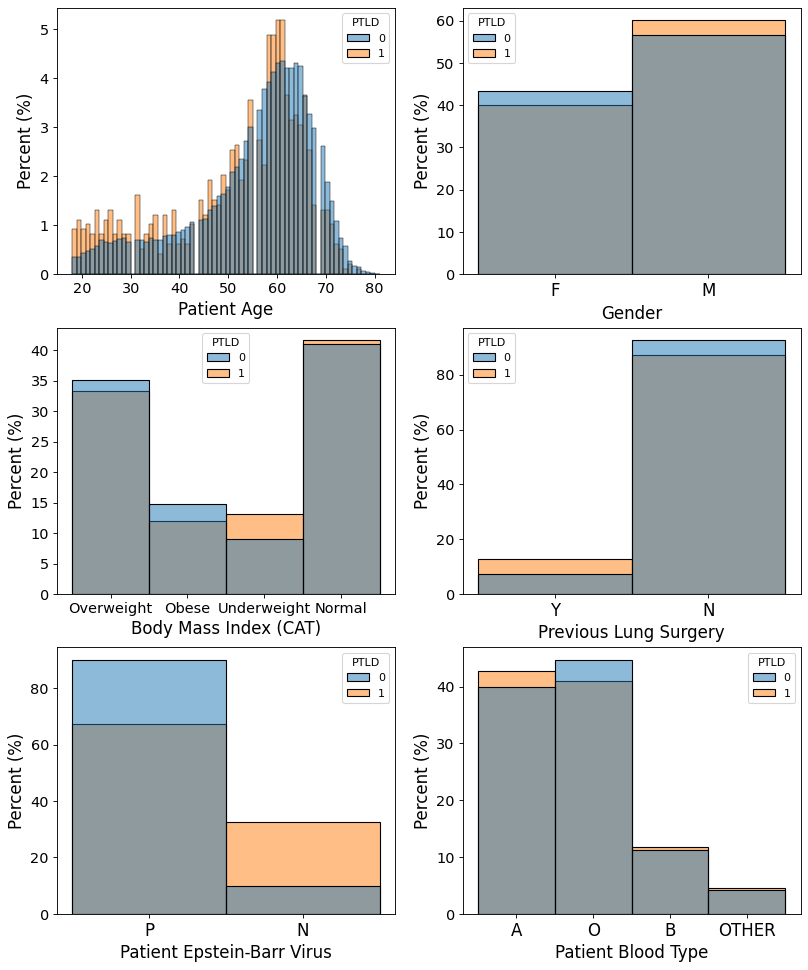

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,2, figsize=(12, 15),dpi=80)
sns.histplot(data, x="REC_AGE_AT_TX", stat="percent",hue="PTLD",common_norm=False,ax=ax[0,0])
ax[0,0].set_xlabel('Patient Age', fontsize=15)
ax[0,0].set_ylabel('Percent (%)', fontsize=15)
ax[0,0].tick_params(axis='x', labelsize=13)
ax[0,0].tick_params(axis='y', labelsize=13)
sns.histplot(data, x="CAN_GENDER", stat="percent",hue="PTLD",common_norm=False,ax=ax[0,1])
ax[0,1].set_xlabel('Gender', fontsize=15)
ax[0,1].set_ylabel('Percent (%)', fontsize=15)
ax[0,1].tick_params(axis='x', labelsize=15)
ax[0,1].tick_params(axis='y', labelsize=13)
sns.histplot(data, x="REC_BMI_CAT", stat="percent",hue="PTLD",common_norm=False,ax=ax[1,0])
ax[1,0].set_xlabel('Body Mass Index (CAT)', fontsize=15)
ax[1,0].set_ylabel('Percent (%)', fontsize=15)
ax[1,0].tick_params(axis='x', labelsize=13)
ax[1,0].tick_params(axis='y', labelsize=13)
sns.histplot(data, x="REC_LU_SURG", stat="percent",hue="PTLD",common_norm=False,ax=ax[1,1])
ax[1,1].set_xlabel('Previous Lung Surgery', fontsize=15)
ax[1,1].set_ylabel('Percent (%)', fontsize=15)
ax[1,1].tick_params(axis='x', labelsize=15)
ax[1,1].tick_params(axis='y', labelsize=13)
sns.histplot(data, x="REC_EBV_STAT", stat="percent",hue="PTLD",common_norm=False,ax=ax[2,0])
ax[2,0].set_xlabel('Patient Epstein-Barr Virus', fontsize=15)
ax[2,0].set_ylabel('Percent (%)', fontsize=15)
ax[2,0].tick_params(axis='x', labelsize=15)
ax[2,0].tick_params(axis='y', labelsize=13)
sns.histplot(data, x="CAN_ABO", stat="percent",hue="PTLD",common_norm=False,ax=ax[2,1])
ax[2,1].set_xlabel('Patient Blood Type', fontsize=15)
ax[2,1].set_ylabel('Percent (%)', fontsize=15)
ax[2,1].tick_params(axis='x', labelsize=15)
ax[2,1].tick_params(axis='y', labelsize=13)